<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/2_Linear_Models_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concept

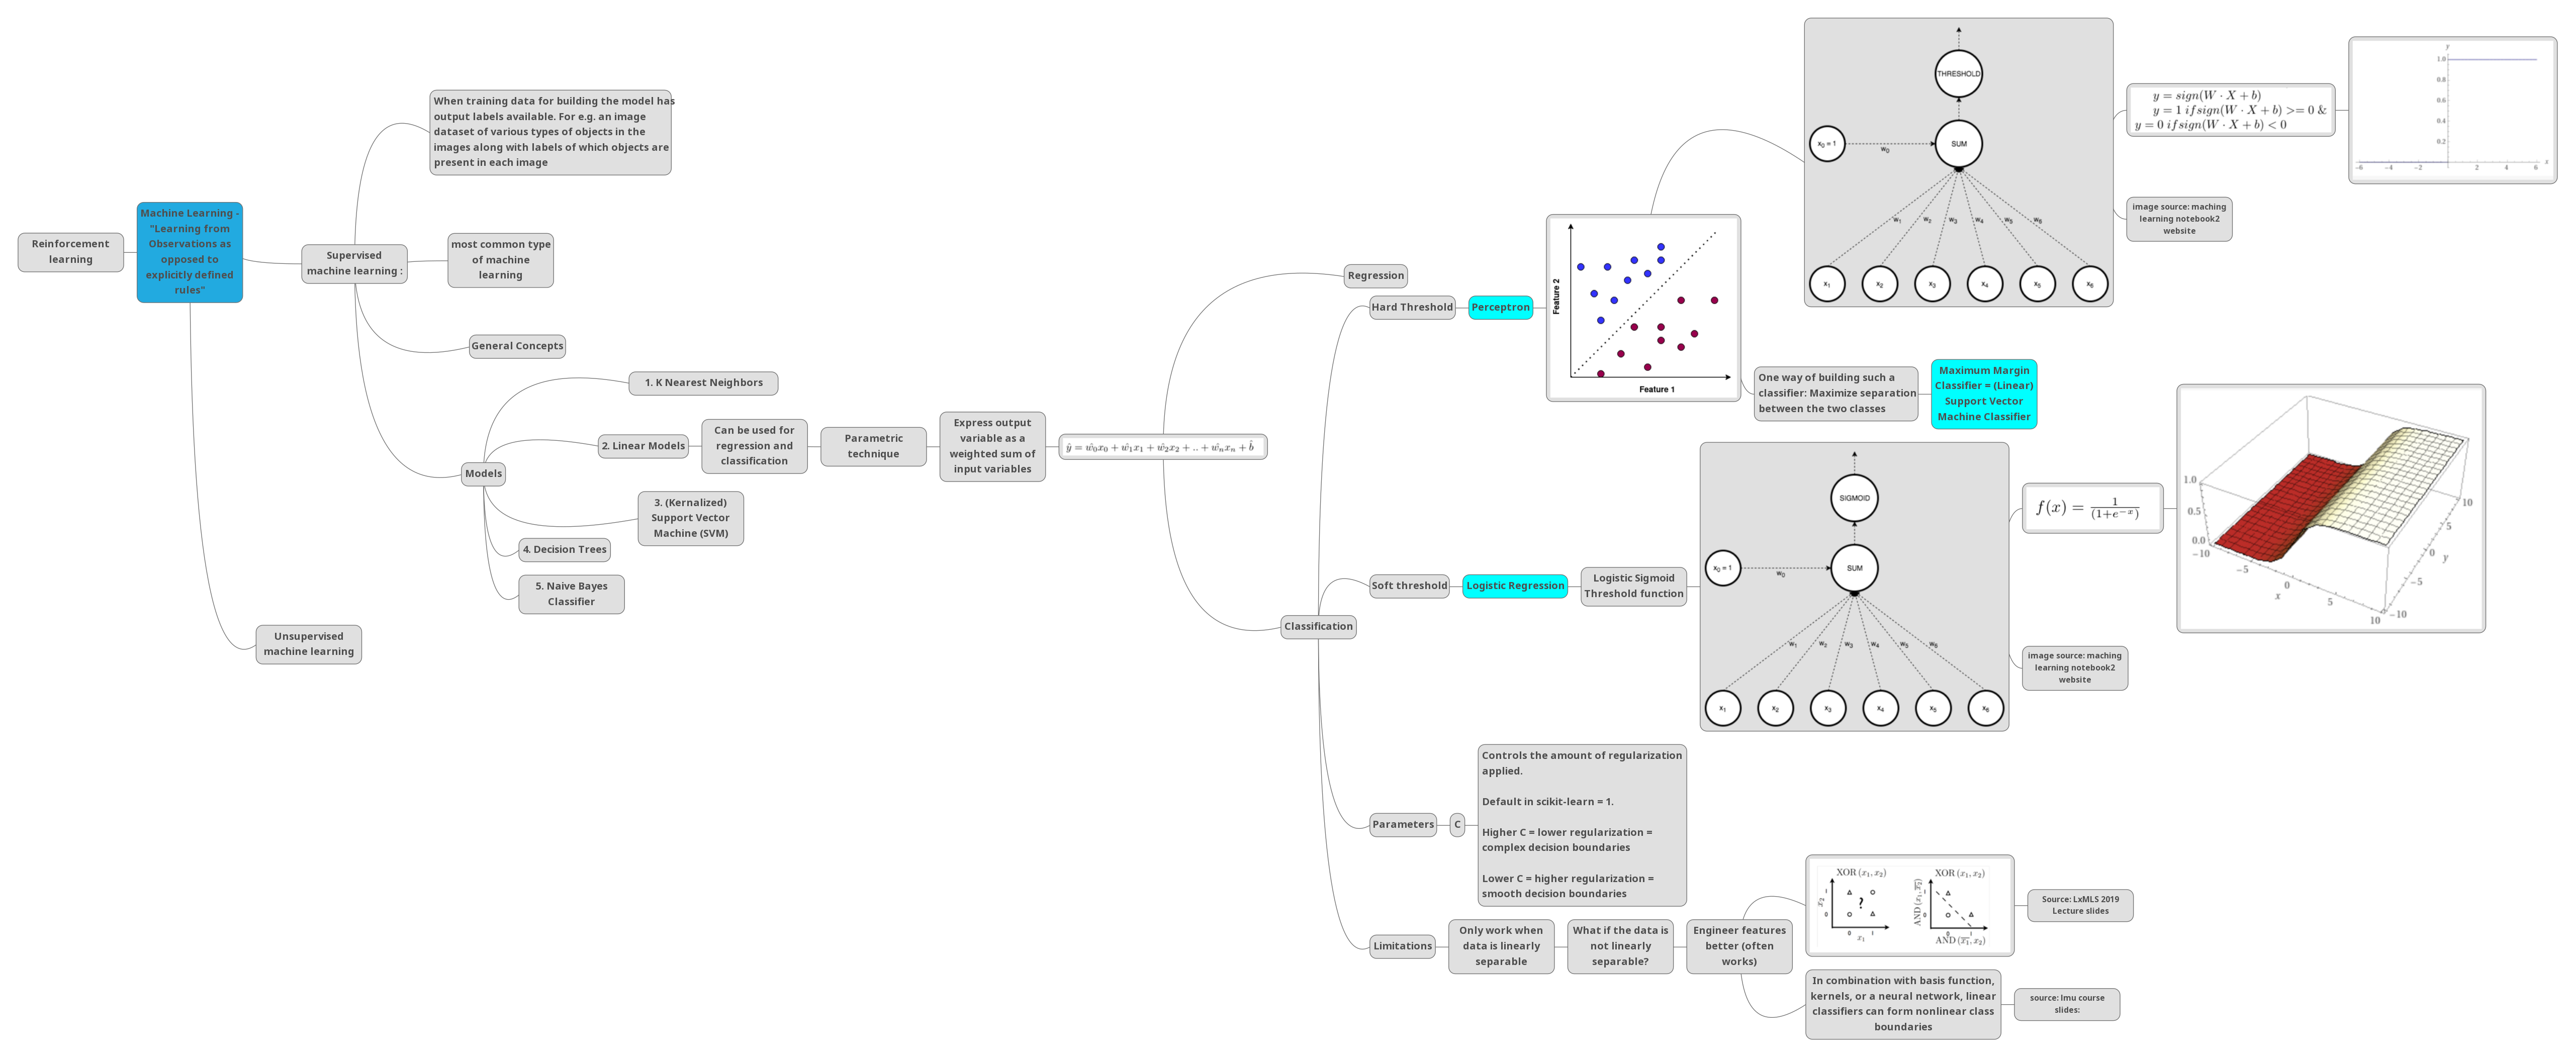

## Case studies 

In [ ]:
# setup 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cp '/content/drive/My Drive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/fruit_data_with_colors.txt' .
!cp '/content/drive/My Drive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/adspy_shared_utilities.py' .

In [ ]:
FruitsData = pd.DataFrame(pd.read_table('fruit_data_with_colors.txt'))

In [ ]:
FruitsData.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [ ]:
FruitsData.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
X_fruits = FruitsData.drop(['fruit_label','fruit_name','fruit_subtype'],axis=1)
y_fruits = FruitsData.fruit_label

In [ ]:
X_fruits_2d = X_fruits[['width','height']]

### Logistic Regression

#### Fruits dataset 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_fruits,y_fruits,test_size = 0.2,random_state = 0)

In [ ]:
y_train.value_counts(normalize=True)

1    0.319149
4    0.297872
3    0.297872
2    0.085106
Name: fruit_label, dtype: float64

In [ ]:
y_test.value_counts()

3    5
1    4
4    2
2    1
Name: fruit_label, dtype: int64

In [ ]:
LogRegBinaryFruits = Pipeline([('scaler',MinMaxScaler()),('model', LogisticRegression(C=10))])

In [ ]:
LogRegBinaryFruits.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [ ]:
print("Logistic Regression on fruit dataset")
print("Model f1-score (training data)= ",f1_score(y_train,LogRegBinaryFruits.predict(X_train),average='macro'))
print("Model f1-score (test data)= ",f1_score(y_test,LogRegBinaryFruits.predict(X_test),average='macro'))
print("Model confusion matrix = \n",confusion_matrix(y_test,LogRegBinaryFruits.predict(X_test)))

Logistic Regression on fruit dataset
Model f1-score (training data)=  0.8933823529411764
Model f1-score (test data)=  0.6236111111111111
Model confusion matrix = 
 [[2 0 2 0]
 [0 1 0 0]
 [3 0 1 1]
 [0 0 0 2]]


#### Synthetic dataset 

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X_C2,y_C2 = make_classification(n_samples=100,n_features=2,random_state=0,flip_y=0.1,class_sep=0.5,n_clusters_per_class=1,n_redundant=0)

Text(0.5, 1.0, 'Simple synthetic dataset for classification')

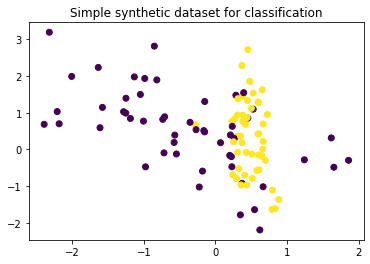

In [ ]:
plt.scatter(X_C2[:,0],X_C2[:,1],c=y_C2)
plt.title("Simple synthetic dataset for classification")

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,test_size = 0.2,random_state = 0)

In [ ]:
LogRegC2 = LogisticRegression()
LogRegC2.fit(X_train,y_train)
print("Logistic regression on binary synthetic dataset")
print("Accuracy (training) = ",LogRegC2.score(X_train,y_train))
print("Accuracy (test) = ",LogRegC2.score(X_test,y_test))
print("f1 (training) = ",f1_score(y_train,LogRegC2.predict(X_train)))
print("f1 (test) = ",f1_score(y_test,LogRegC2.predict(X_test)))

Logistic regression on binary synthetic dataset
Accuracy (training) =  0.8125
Accuracy (test) =  0.85
f1 (training) =  0.8275862068965517
f1 (test) =  0.823529411764706


#### Breast Cancer Dataset 

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
CancerData = load_breast_cancer()

In [ ]:
print(CancerData.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
X_Cancer = pd.DataFrame(CancerData.data,columns=CancerData.feature_names)
y_Cancer = pd.Series(CancerData.target,name='TumorClass')

In [ ]:
# CancerData.target_names

In [ ]:
X_Cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y_Cancer.value_counts()
# y_Cancer[y_Cancer == 1] = 'Benign'
# y_Cancer[y_Cancer == 0] = 'Malignant'

1    357
0    212
Name: TumorClass, dtype: int64

* 357 benign tumours
* 212 malignant tumours

In [ ]:
LogRegBreastCancer = Pipeline([('scaler',MinMaxScaler()),('model',LogisticRegression())])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_Cancer,y_Cancer,random_state = 0,test_size = 0.2)

In [ ]:
LogRegBreastCancer.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
print("Logistic Regression on breast Cancer dataset")
print("Confusion Matrix: training dataset \n",confusion_matrix(y_train,LogRegBreastCancer.predict(X_train)))
print("Confusion Matrix: test dataset \n",confusion_matrix(y_test,LogRegBreastCancer.predict(X_test)))
print("f1 score: training dataset \n",f1_score(y_train,LogRegBreastCancer.predict(X_train)))
print("f1 score: test dataset \n",f1_score(y_test,LogRegBreastCancer.predict(X_test)))

Logistic Regression on breast Cancer dataset
Confusion Matrix: training dataset 
 [[152  13]
 [  1 289]]
Confusion Matrix: test dataset 
 [[43  4]
 [ 0 67]]
f1 score: training dataset 
 0.9763513513513513
f1 score: test dataset 
 0.9710144927536231


### Linear SVM

#### Synthetic dataset

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,test_size = 0.2, random_state = 0)

In [ ]:
LinSVM_binclass = LinearSVC()

In [ ]:
LinSVM_binclass.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print("Linear SVC on synthetic binary classification dataset")
print("Confusion Matrix: training dataset \n",confusion_matrix(y_train,LinSVM_binclass.predict(X_train)))
print("Confusion Matrix: test dataset \n",confusion_matrix(y_test,LinSVM_binclass.predict(X_test)))
print("f1 score: training dataset \n",round(f1_score(y_train,LinSVM_binclass.predict(X_train)),2))
print("f1 score: test dataset \n",round(f1_score(y_test,LinSVM_binclass.predict(X_test)),2))
print("Accuracy: training dataset \n",round(accuracy_score(y_train,LinSVM_binclass.predict(X_train)),2))
print("Accuracy: test dataset \n",round(accuracy_score(y_test,LinSVM_binclass.predict(X_test)),2))

Linear SVC on synthetic binary classification dataset
Confusion Matrix: training dataset 
 [[30 11]
 [ 4 35]]
Confusion Matrix: test dataset 
 [[10  1]
 [ 2  7]]
f1 score: training dataset 
 0.82
f1 score: test dataset 
 0.82
Accuracy: training dataset 
 0.81
Accuracy: test dataset 
 0.85


In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

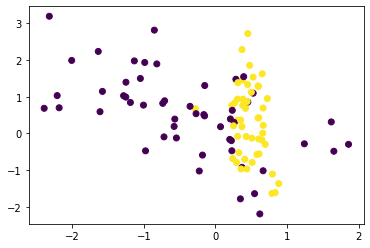

In [ ]:
plt.scatter(X_C2[:,0],X_C2[:,1],c=y_C2)

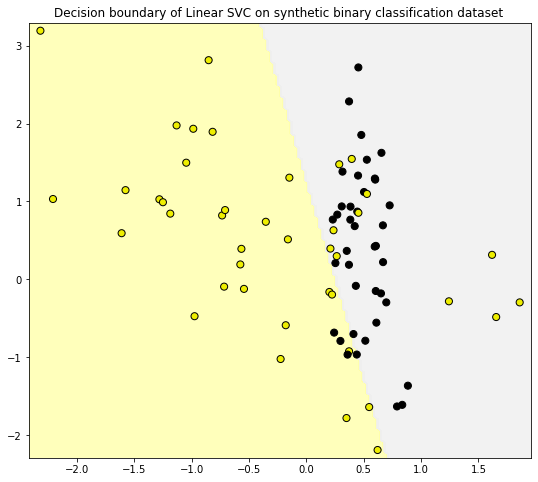

In [ ]:
fig,subaxes = plt.subplots(1,1,figsize = (9,8))
title = 'Decision boundary of Linear SVC on synthetic binary classification dataset '
plot_class_regions_for_classifier_subplot(LinSVM_binclass,X_train,y_train,None,None,title,subaxes)


* Varying C parameter

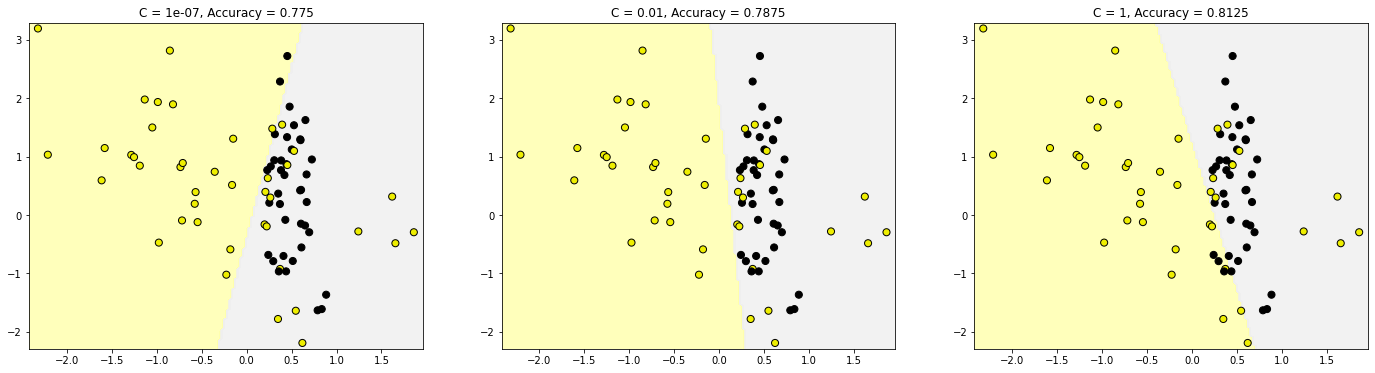

In [ ]:
fig,subaxes = plt.subplots(1,3,figsize = (24,6))
for C_itn,subaxis in zip([0.0000001,0.01,1],subaxes):
  LinSVM_itn = LinearSVC(C=C_itn)
  LinSVM_itn.fit(X_train,y_train)
  title = 'C = {}, Accuracy = {}'.format(C_itn,accuracy_score(y_train,LinSVM_itn.predict(X_train)))
  plot_class_regions_for_classifier_subplot(LinSVM_itn,X_train,y_train,None,None,title,subaxis)


* C parameter value has inverse effect on regularization. 
  * High C = low regularization = more complex models
  * Low C = high regularization = less complex models 

* Interactive demo from: https://jgreitemann.github.io/svm-demo   
(Mu = regularization parameter)

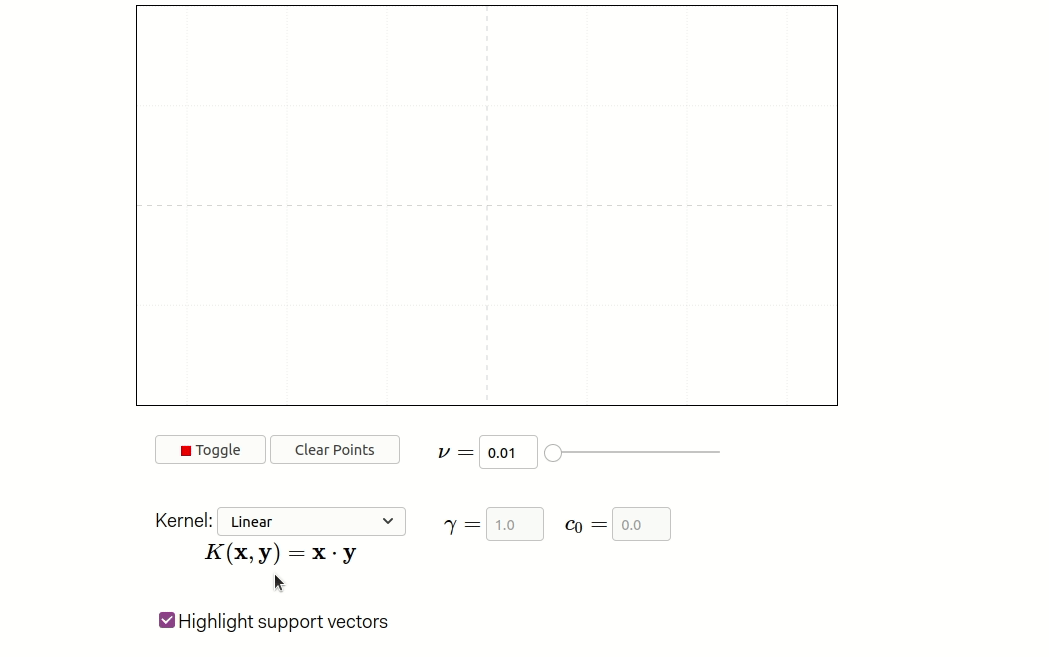

* Thus low values of regularization parameter lead to overfitting, narrow margins, and being prone to noise.  
* On the other hand, larger value of regularization parameter lead to larger margins and very high values might miss certain features.
* Choice of the regularization parameter depends on the task and the data

#### Breast Cancer Dataset 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_Cancer,y_Cancer,random_state = 0,test_size = 0.2)

In [ ]:
LinSVM_Cancer = Pipeline([('Scaler',MinMaxScaler()),('Model',LinearSVC())])
LinSVM_Cancer.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Model',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
print("Linear SVM on Breast Cancer dataset")
print("Training data F1 score = {}".format(round(f1_score(y_train,LinSVM_Cancer.predict(X_train)),2)))
print("Test data F1 score = {}".format(round(f1_score(y_test,LinSVM_Cancer.predict(X_test)),2)))

Linear SVM on Breast Cancer dataset
Training data F1 score = 0.98
Test data F1 score = 0.97


#### Fruits Dataset (Multiclass classification)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_fruits_2d,y_fruits, random_state=0,test_size = 0.2)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
LinSVC_Fruits = LinearSVC(C=5)
LinSVC_Fruits.fit(X_train,y_train)

LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

* What does random state within the model help with? 
* What initializations happen there that we are trying to standardize? 

In [ ]:
print("Linear SVC on 2d fruits dataset: Coefficients = ",LinSVC_Fruits.coef_)

Linear SVC on 2d fruits dataset: Coefficients =  [[ 2.25999498 -1.70207956]
 [-1.06474366 -3.10308161]
 [ 1.3989102   0.04000449]
 [-4.17363346  3.99670937]]


In [ ]:
print("Linear SVC on 2d fruits dataset: Coefficients = ",LinSVC_Fruits.intercept_)

Linear SVC on 2d fruits dataset: Coefficients =  [-0.28626009  0.98650155 -0.943894   -1.2897025 ]


* Plot decision boundaries

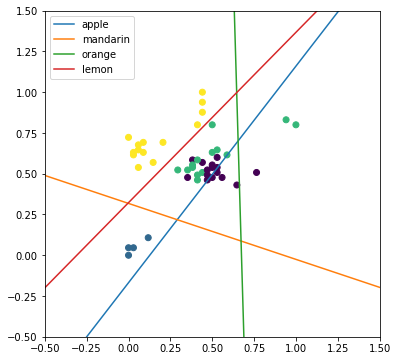

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

x0 = np.linspace(-1,2)
x1 = -(x0*LinSVC_Fruits.coef_[0][0] + LinSVC_Fruits.intercept_[0])/LinSVC_Fruits.coef_[0][1]
x2 = -(x0*LinSVC_Fruits.coef_[1][0] + LinSVC_Fruits.intercept_[1])/LinSVC_Fruits.coef_[1][1]
x3 = -(x0*LinSVC_Fruits.coef_[2][0] + LinSVC_Fruits.intercept_[2])/LinSVC_Fruits.coef_[2][1]
x4 = -(x0*LinSVC_Fruits.coef_[3][0] + LinSVC_Fruits.intercept_[3])/LinSVC_Fruits.coef_[3][1]
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.plot(x0,x1)
plt.plot(x0,x2)
plt.plot(x0,x3)
plt.plot(x0,x4)
plt.legend(FruitsData.fruit_name.unique())

In [ ]:
confusion_matrix(y_train,LinSVC_Fruits.predict(X_train))

array([[14,  0,  1,  0],
       [ 0,  4,  0,  0],
       [ 9,  0,  3,  2],
       [ 0,  0,  0, 14]])

In [ ]:
confusion_matrix(y_test,LinSVC_Fruits.predict(X_test))

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [3, 0, 1, 1],
       [0, 0, 0, 2]])

In [ ]:
f1_score(y_test,LinSVC_Fruits.predict(X_test),average='macro')

0.7151515151515151

* Default C value gave f1 (macro) on test data about ~0.60

In [ ]:
FruitsData.groupby(['fruit_label','fruit_name']).size()

fruit_label  fruit_name
1            apple         19
2            mandarin       5
3            orange        19
4            lemon         16
dtype: int64

* Thus Orange class is most often misclassified as Apple in the model
* The rest of the classes are ok 

* todo: generate your own dataset for svm and change C to see the accuracy changes. 

## Advanced Reading
1. [Linear Learners](http://lxmls.it.pt/2019/LINEAR_LEARNERS.pdf)